# **Import Library**

In [1]:
# import all necessary packages
import pandas as pd
import numpy as np


# import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
# import ML related packages of sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# **Data Load**

In [2]:
# load data to a new dataframe
df = pd.read_csv("data_revisi.csv")

# **Data Check**

In [3]:
# check the shape
df.dtypes

Nama                 object
gender                int64
umur                  int64
average_wpm         float64
average_accuracy    float64
average_second      float64
dtype: object

In [4]:
# first five rows of the dataframe
df.head()

,Nama,gender,umur,average_wpm,average_accuracy,average_second
0,APS,1,25,60.33,0.99,377.6
1,AP,0,22,41.00,0.95,508.8
2,DAP,1,20,52.33,0.94,560.4
3,DF,1,22,38.67,0.81,320.6
4,DRF,1,20,28.00,1.00,639.4


# **Membuat Dataframe Untuk Variabel**

In [5]:
#membuat dataframe khusus untuk variabel yang akan digunakan
new_df = df[['average_wpm', 'average_second']]
new_df

,average_wpm,average_second
0,60.33,377.60
1,41.00,508.80
2,52.33,560.40
3,38.67,320.60
4,28.00,639.40
...,...,...
95,34.09,464.42
96,50.09,415.59
97,44.58,481.00
98,37.20,425.45


# **Data Plot**

<Axes: xlabel='average_wpm', ylabel='average_second'>

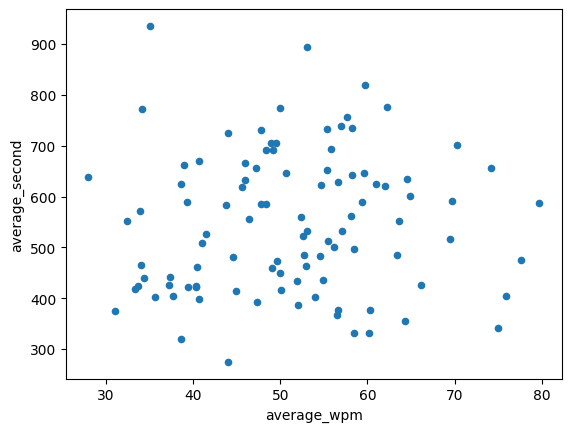

In [6]:
# check the distribution of data by plotting as scatter
new_df.plot(x='average_wpm', y='average_second', kind='scatter')	

# **Deklarasi Variabel**

In [7]:
# deklarasi x dan y dari dataframe yang baru
x = new_df['average_wpm'].values.reshape(-1, 1)
y = new_df['average_second'].values.reshape(-1, 1)

# **NORMALISASI** 
### _'average_wpm' dan 'average_second'_

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
#Normalize x variabel
scalar = MinMaxScaler()
scalar.fit(x)
new_x = scalar.transform(x)
new_x

array([[0.62545947],
       [0.25149932],
       [0.47069066],
       [0.20642291],
       [0.        ],
       [0.52872896],
       [0.37396015],
       [0.50299865],
       [0.61269104],
       [0.30953763],
       [0.34822983],
       [0.34184562],
       [0.10311472],
       [0.80615206],
       [0.12246082],
       [0.34822983],
       [0.41923003],
       [0.30953763],
       [0.39330625],
       [0.43857613],
       [0.90926678],
       [0.24027858],
       [0.38247243],
       [0.55387889],
       [0.18107951],
       [0.55465274],
       [0.58328497],
       [0.32810989],
       [0.40607468],
       [0.4064616 ],
       [0.23815051],
       [0.48481331],
       [0.3950474 ],
       [0.11975237],
       [0.61114335],
       [0.47784871],
       [0.573225  ],
       [0.41013736],
       [0.13716386],
       [0.71348423],
       [0.08589669],
       [0.81775972],
       [0.95898626],
       [0.26020507],
       [0.58579996],
       [0.60766106],
       [0.55252467],
       [0.530

In [10]:
#Normalize y variabel
scalar = MinMaxScaler()
scalar.fit(y)
new_y = scalar.transform(y)
new_y

array([[0.15558313],
       [0.35414838],
       [0.43224264],
       [0.06931622],
       [0.55180555],
       [0.69255683],
       [0.17767957],
       [0.19463026],
       [0.82271393],
       [0.        ],
       [0.59327421],
       [0.520023  ],
       [0.21824015],
       [0.47825166],
       [0.24911463],
       [0.54090868],
       [0.29936132],
       [0.68226534],
       [0.63050519],
       [0.56209704],
       [0.099888  ],
       [0.28192633],
       [0.46960983],
       [0.53527863],
       [0.25227775],
       [0.15343403],
       [0.43542089],
       [0.21014317],
       [0.65037685],
       [0.28041287],
       [0.2259285 ],
       [0.93578412],
       [0.46994279],
       [0.7537458 ],
       [0.5631716 ],
       [0.31927838],
       [0.7299997 ],
       [0.63000575],
       [1.        ],
       [0.49349215],
       [0.4188637 ],
       [0.64432303],
       [0.30378061],
       [0.38161758],
       [0.5562097 ],
       [0.47576959],
       [0.14029724],
       [0.359

# **Split *Data Train* dan *Data Test***

In [11]:
results = []

In [12]:
# Loop untuk menguji setiap random_state dari 1 hingga 100
for random_state in range(1, 101):
    # Bagi data menjadi data latih dan data uji
    x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2, random_state=random_state)
    
    # Buat model regresi linear
    model = LinearRegression()
    
    # Latih model pada data latih
    model.fit(x_train, y_train)
    
    # Lakukan prediksi pada data uji
    y_pred = model.predict(x_test)
    
    # Hitung metrik evaluasi
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Simpan hasil metrik dalam bentuk tuple
    result = (random_state, rmse, mae, mse, r2)
    
    # Tambahkan tuple hasil metrik ke dalam list results
    results.append(result)

In [13]:
# Konversi list hasil metrik menjadi DataFrame
results_df = pd.DataFrame(results, columns=['Random State', 'RMSE', 'MAE', 'MSE', 'R2'])

In [14]:
# Atur jumlah baris yang ditampilkan
pd.set_option("display.max_rows", None)

# Cetak DataFrame results_df
print(results_df)

    Random State      RMSE       MAE       MSE        R2
0              1  0.253423  0.220749  0.064223 -0.399831
1              2  0.192947  0.175242  0.037229 -0.090115
2              3  0.207992  0.182644  0.043261 -0.053317
3              4  0.152953  0.129959  0.023394 -0.077766
4              5  0.197711  0.172780  0.039090 -0.096164
5              6  0.188875  0.160028  0.035674 -0.042384
6              7  0.155162  0.123780  0.024075 -0.103456
7              8  0.191352  0.165588  0.036615 -0.001598
8              9  0.189244  0.157095  0.035813 -0.202877
9             10  0.232232  0.189118  0.053932 -0.002542
10            11  0.244849  0.210517  0.059951 -0.013014
11            12  0.252362  0.215208  0.063687 -0.058202
12            13  0.235775  0.202937  0.055590 -0.026790
13            14  0.180078  0.148684  0.032428  0.004524
14            15  0.265356  0.235831  0.070414 -0.047186
15            16  0.224982  0.189731  0.050617 -0.885586
16            17  0.207437  0.1

# **Membuat Model**

In [15]:
# create a linear regression model
model = LinearRegression()

# **Training Data**

In [16]:
# train the model using training data
# since we have only one independent variable, you should use 'values.reshape(-1,1)'. Otherwise, x_train is enough.
model.fit(x_train, y_train)  

LinearRegression()

In [17]:
# print coefficient
model.coef_

array([[0.04801387]])

In [18]:
# print y_intercept | bias
model.intercept_

array([0.38519045])

# **Prediksi Model**

In [19]:
# make predictions using test data
y_pred = model.predict(x_test)

In [20]:
# let's calculate the metrics
# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)
# RMSE
import math
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)
# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)
# R2
r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

MSE -->  0.04182234354529746
RMSE -->  0.20450511862859927
MAE -->  0.18092301260519764
R2 -->  -0.02340762371534444


# **Data Visualisasi**

Text(0, 0.5, 'Predicted')

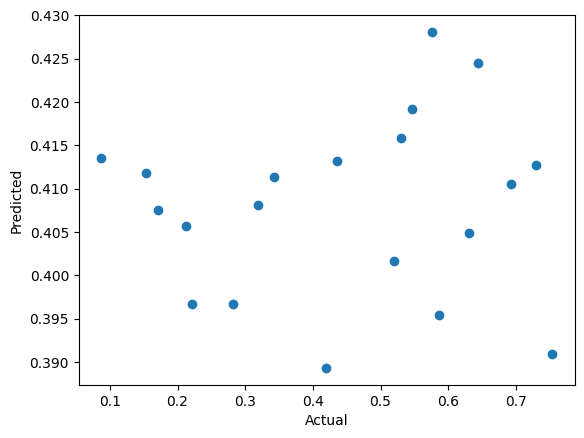

In [21]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: >

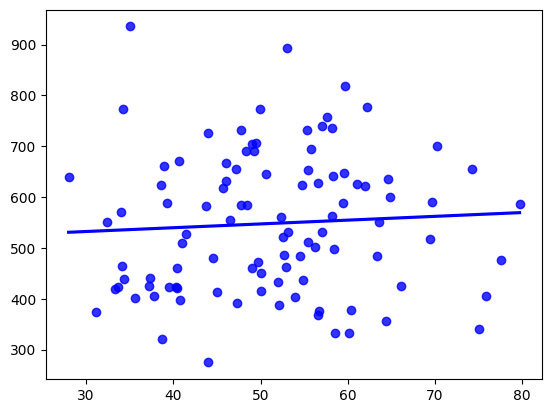

In [22]:
# plot regression model line
sns.regplot(x=x, y=y, ci=None, color ='blue')

# **Membuat Input**

In [23]:
input_data = np.array([[79]])

prediction = model.predict(input_data)
denormalized_prediction = scalar.inverse_transform(prediction)

print('Estimasi kecepatan waktu : ', prediction)

Estimasi kecepatan waktu :  [[4.17828649]]


# **Save Model**

In [24]:
import pickle

filename = 'estimasi_waktu_lr.sav'
pickle.dump(model,open(filename,'wb'))

with open('y.pickle', 'wb') as file:
    pickle.dump(y, file)
